In [1]:
#####################################################
# Author: Prof. Marc Jofre
# Dept. Network Engineering
# Universitat Politècnica de Catalunya - Technical University of Catalonia
#
# Modified: 2024
# Created: 2024
#
# Script Quantum LAN application Dealer layer
#####################################################
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") # Restart the kernel to clean up previous
#####################################################
import sys, os, signal
#!pip install --upgrade pip
#!pip install --upgrade pillow
#!pip install matplotlib
#!pip install numpy
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from google.colab import files
#print(plt.style.available)
mpl.style.use('default')
import time

pathScriptBelowAgentScript='./CppScripts/'
sys.path.append(pathScriptBelowAgentScript)
pathScriptBelowAgentScript='./JupyterPythonScripts/'
sys.path.append(pathScriptBelowAgentScript)
pathScriptData='../../GeneratedDataPythonJupyter/'

def GeneralSettingsPlots():
  SMALL_SIZE = 12
  MEDIUM_SIZE = 16
  BIGGER_SIZE = 18

  plt.rc('figure', figsize=[6.4, 4.8])     # controls default Figure size. Default is [6.4, 4.8]
  plt.rc('figure', autolayout = True)      # code will produce the same graphs on differently-configured machines
  plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
  plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
  plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
  plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
  plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
  plt.rc('lines', linewidth=2) # 1 line width
  plt.rc('lines', markersize=10) # 6 marker size
GeneralSettingsPlots()

In [2]:
import QpresentationLayerAgent
# If needed to reload the module above without re-initializing
#import importlib
#importlib.reload(QpresentationLayerAgent)

#####################################################
# Parameters
## Network
IPhostDealerOpNet = "127.0.0.3"#10.0.0.4" # IP address of the dealer host (this host) in the operational network
IPhostDealerConNet = "10.0.0.4"#"192.168.10.1" # IP address of the dealer host (this host) in the control/configuration network
IPnodeDealerConNet = "10.0.0.252"#"192.168.10.2" # IP address of the dealer node (connected to the dealer host) in the control/configuration network
IPhostServerOpNet = "127.0.0.2"#"10.0.0.3" # IP address of the server host (this host) in the operational network
IPnodeServerConNet = "10.0.0.253"#"192.168.9.2" # IP address of the server node (connected to the server host) in the control/configuration network
IPhostClientOpNet = "127.0.0.1"#"10.0.0.1" # IP address of the host client (connected to the server host) in the operational network
IPnodeClientConNet = "10.0.0.254"#"192.168.8.2" # IP address of the client node (connecte to the client host) in the control/configuration network

# Hard coded correspondence tables identifying quad group channels for automatic synchronization periodic operations
# The order is stablished due to the physical connections between nodes, where the logical order follows the IPaddressesSockets in QtransportLayerAgentH.h for toehr OpNet nodes
ParamsTableAutoSynchQuadChEmt = "1;2;" # Coded from 1 to 7 (0 would not select any quad group channel) emit
ParamsTableAutoSynchQuadChDet = "2;1;" # Coded from 1 to 7 (0 would not select any quad group channel) detect

ParamsDealerListChar = ["dealer",IPnodeDealerConNet,IPhostDealerConNet,IPhostDealerOpNet,IPhostServerOpNet,IPhostClientOpNet]
ParamsDealerListChar.append(ParamsTableAutoSynchQuadChEmt)
ParamsDealerListChar.append(ParamsTableAutoSynchQuadChDet)
##############################################################
# Functions
def ListCharArrayParser(ListCharArrayAux):
    # Actually concatenating a python list of strings to a single string
    ParsedCharArrayAux=",".join(ListCharArrayAux)+","
    return ParsedCharArrayAux

# The parameters passed and received from agents are structured
ParamsAscendingCharArray = "none"
ParamsDescendingCharArray = ListCharArrayParser(ParamsDealerListChar)

### RUN UP TO HERE (INCLUDED) TO INITIALIZE CONNECTIONS AND THREAD QtransportLayerAgentH thread #####
# At this point, in this order, the node in the server has been initialized, the node in the client, the server host (up to this equivalent point) and then the client host (up to here)
# Create instance of Agent below
QPLAagent = QpresentationLayerAgent.QPLA(ParamsDescendingCharArray,ParamsAscendingCharArray)
def signal_handler(signal_received,frame):
    print(f'Signal {signal_received} received, exiting gracefully.')
    # Perform any cleanup here
    del QPLAagent
    sys.exit(0)

# Set up signal handlers
signal.signal(signal.SIGINT, signal_handler)  # Handle Ctrl+C
signal.signal(signal.SIGPIPE, signal_handler) # Handle broken pipe errors
#signal.signal(signal.SIGSEGV, signal_handler) # Handle segmentation faults (typically memory errors)
signal.signal(signal.SIGHUP, signal_handler) # Handle when terminal window is closed
signal.signal(signal.SIGTERM, signal_handler) # Termination request
### Initiate thread process in QtransportLayerAgentH
QPLAagent.InitAgentProcess() # Initialize the thread in QtransportLayerAgentH

Host starting socket server to host/node: 10.0.0.252
Host starting socket server to host/node: 127.0.0.2
Host starting socket server to host/node: 127.0.0.1
Host client connected to server: 10.0.0.252
Host client connected to server: 127.0.0.2
Host client connected to server: 127.0.0.1
Starting in pause state the QtransportLayerAgentH
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardware NOT synched...
Node 10.0.0.252 hardwar

In [ ]:
#####################
# Some tests to send information to the different elements and see them output at the respective console
# The required fields of a message are (separated by commas): IPdestination,IPorigin,Type,Command,Payload
messagePayloadAux="Host dealer sends information to attached node"
messageCommandAux="print"
messageTypeAux="Control"
messageIPorg=IPhostDealerOpNet
messageIPdest=IPnodeDealerConNet
messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
QPLAagent.SendMessageAgent(messageAuxChar)

messagePayloadAux="Host dealer sends information to server host"
messageCommandAux="print"
messageTypeAux="Operation"
messageIPorg=IPhostDealerOpNet
messageIPdest=IPhostServerOpNet
messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
QPLAagent.SendMessageAgent(messageAuxChar)

messagePayloadAux="Host dealer sends information to host server node"
messageCommandAux="print"
messageTypeAux="Control"
messageIPorg=IPhostDealerOpNet
messageIPdest=IPhostServerOpNet # Notice that it is send to the host (which it will forward it to the node)
messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
QPLAagent.SendMessageAgent(messageAuxChar)

messagePayloadAux="Host dealer sends information to client host"
messageCommandAux="print"
messageTypeAux="Operation"
messageIPorg=IPhostDealerOpNet
messageIPdest=IPhostClientOpNet
messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
QPLAagent.SendMessageAgent(messageAuxChar)

messagePayloadAux="Host dealer sends information to host client node"
messageCommandAux="print"
messageTypeAux="Control"
messageIPorg=IPhostDealerOpNet
messageIPdest=IPhostClientOpNet # Notice that it is send to the host (which it will forward it to the node)
messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
QPLAagent.SendMessageAgent(messageAuxChar)

In [ ]:
#### Some test to send entangled QuBits from the dealer to two other hosts #################
QuadChEmtDet=np.asarray([3,2,1]) # Emit, Detect, Detect
SynchPRUoffFreqVal=np.asarray([0.0,0.0])# Double value to adjust synch signals offset and frequency for each quantum channel
PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
NumRequestedQubitsSend=65536 # Qubits to send
NumRequestedQubitsReceive=1964# Qubits signals to detect
argsPayloadBlockUnblockList=[IPhostClientOpNet,IPhostServerOpNet]
QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
QPLAagent.SimulateSendEntangledQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerConNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that the other nodes of the specified hosts get ready to receive entangled qubits from the dealer's node
NumStoredQubitsNode1 = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
StatisticsTimeTagDetStoredQubitsNode1 = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPhostClientOpNet,IPhostDealerOpNet,NumStoredQubitsNode1,StatisticsTimeTagDetStoredQubitsNode1) # Supposing that node has received quBits, return number of QuBits
print('NumStoredQubitsNode1[0]: '+str(NumStoredQubitsNode1[0]))
print('StatisticsTimeTagDetStoredQubitsNode1: '+str(StatisticsTimeTagDetStoredQubitsNode1))
NumStoredQubitsNode2 = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
StatisticsTimeTagDetStoredQubitsNode2 = np.zeros(8, dtype=np.double)# equivalnet to float64for C like arrays
QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPhostServerOpNet,IPhostDealerOpNet,NumStoredQubitsNode2,StatisticsTimeTagDetStoredQubitsNode2) # Supposing that node has received quBits, return number of QuBits
QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
print('NumStoredQubitsNode2[0]: '+str(NumStoredQubitsNode2[0]))
print('StatisticsTimeTagDetStoredQubitsNode2: '+str(StatisticsTimeTagDetStoredQubitsNode2))

In [ ]:
###### Hard resilience test #######
import random
import time
NumTestMax = 1000
ListNumStoredQubitsNode1=[]
ListStatisticsTimeTaggDetQubitsNode1Param0=[]
ListStatisticsTimeTaggDetQubitsNode1Param1=[]
ListStatisticsTimeTaggDetQubitsNode1Param2=[]
ListStatisticsTimeTaggDetQubitsNode1Param3=[]
ListStatisticsTimeTaggDetQubitsNode1Param4=[]
ListStatisticsTimeTaggDetQubitsNode1Param5=[]
ListStatisticsTimeTaggDetQubitsNode1Param6=[]
ListStatisticsTimeTaggDetQubitsNode1Param7=[]
ListNumStoredQubitsNode2=[]
ListStatisticsTimeTaggDetQubitsNode2Param0=[]
ListStatisticsTimeTaggDetQubitsNode2Param1=[]
ListStatisticsTimeTaggDetQubitsNode2Param2=[]
ListStatisticsTimeTaggDetQubitsNode2Param3=[]
ListStatisticsTimeTaggDetQubitsNode2Param4=[]
ListStatisticsTimeTaggDetQubitsNode2Param5=[]
ListStatisticsTimeTaggDetQubitsNode2Param6=[]
ListStatisticsTimeTaggDetQubitsNode2Param7=[]
for iIterTest in range(0,NumTestMax,1):
    RandomTestNum=random.randint(0, 1)
    if (RandomTestNum==0):
        # Sending messages
        messagePayloadAux="Host dealer sends information to attached node"
        messageCommandAux="print"
        messageTypeAux="Control"
        messageIPorg=IPhostDealerOpNet
        messageIPdest=IPnodeDealerConNet
        messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
        QPLAagent.SendMessageAgent(messageAuxChar)
        time.sleep(0.1)
        messagePayloadAux="Host dealer sends information to server host"
        messageCommandAux="print"
        messageTypeAux="Operation"
        messageIPorg=IPhostDealerOpNet
        messageIPdest=IPhostServerOpNet
        messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
        QPLAagent.SendMessageAgent(messageAuxChar)
        time.sleep(0.1)
        messagePayloadAux="Host dealer sends information to host server node"
        messageCommandAux="print"
        messageTypeAux="Control"
        messageIPorg=IPhostDealerOpNet
        messageIPdest=IPhostServerOpNet # Notice that it is send to the host (which it will forward it to the node)
        messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
        QPLAagent.SendMessageAgent(messageAuxChar)
        time.sleep(0.1)
        messagePayloadAux="Host dealer sends information to client host"
        messageCommandAux="print"
        messageTypeAux="Operation"
        messageIPorg=IPhostDealerOpNet
        messageIPdest=IPhostClientOpNet
        messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
        QPLAagent.SendMessageAgent(messageAuxChar)
        time.sleep(0.1)
        messagePayloadAux="Host dealer sends information to host client node"
        messageCommandAux="print"
        messageTypeAux="Control"
        messageIPorg=IPhostDealerOpNet
        messageIPdest=IPhostClientOpNet # Notice that it is send to the host (which it will forward it to the node)
        messageAuxChar = ListCharArrayParser([messageIPdest,messageIPorg,messageTypeAux,messageCommandAux,messagePayloadAux])
        QPLAagent.SendMessageAgent(messageAuxChar)      
    else:
        # Sending Entangled QuBits
        QuadChEmtDet=np.asarray([3,2,1]) # Emit, Detect, Detect
        SynchPRUoffFreqVal=np.asarray([0.0,0.0])# Double value to adjust synch signals offset and frequency for each quantum channel
        PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
        NumRequestedQubitsSend=65536 # Qubits to send
        NumRequestedQubitsReceive=1964# Qubits signals to detect
        argsPayloadBlockUnblockList=[IPhostClientOpNet,IPhostServerOpNet]
        QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
        QPLAagent.SimulateSendEntangledQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerConNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that the other nodes of the specified hosts get ready to receive entangled qubits from the dealer's node
        NumStoredQubitsNode1 = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
        StatisticsTimeTagDetStoredQubitsNode1 = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
        QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPhostClientOpNet,IPhostDealerOpNet,NumStoredQubitsNode1,StatisticsTimeTagDetStoredQubitsNode1) # Supposing that node has received quBits, return number of QuBits
        NumStoredQubitsNode2 = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
        StatisticsTimeTagDetStoredQubitsNode2 = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
        QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPhostServerOpNet,IPhostDealerOpNet,NumStoredQubitsNode2,StatisticsTimeTagDetStoredQubitsNode2) # Supposing that node has received quBits, return number of QuBits
        QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
        ListNumStoredQubitsNode1.append(NumStoredQubitsNode1[0])
        ListStatisticsTimeTaggDetQubitsNode1Param0.append(StatisticsTimeTagDetStoredQubitsNode1[0])
        ListStatisticsTimeTaggDetQubitsNode1Param1.append(StatisticsTimeTagDetStoredQubitsNode1[1])
        ListStatisticsTimeTaggDetQubitsNode1Param2.append(StatisticsTimeTagDetStoredQubitsNode1[2])
        ListStatisticsTimeTaggDetQubitsNode1Param3.append(StatisticsTimeTagDetStoredQubitsNode1[3])
        ListStatisticsTimeTaggDetQubitsNode1Param4.append(StatisticsTimeTagDetStoredQubitsNode1[4])
        ListStatisticsTimeTaggDetQubitsNode1Param5.append(StatisticsTimeTagDetStoredQubitsNode1[5])
        ListStatisticsTimeTaggDetQubitsNode1Param6.append(StatisticsTimeTagDetStoredQubitsNode1[6])
        ListStatisticsTimeTaggDetQubitsNode1Param7.append(StatisticsTimeTagDetStoredQubitsNode1[7])
        ListNumStoredQubitsNode2.append(NumStoredQubitsNode2[0])
        ListStatisticsTimeTaggDetQubitsNode2Param0.append(StatisticsTimeTagDetStoredQubitsNode2[0])
        ListStatisticsTimeTaggDetQubitsNode2Param1.append(StatisticsTimeTagDetStoredQubitsNode2[1])
        ListStatisticsTimeTaggDetQubitsNode2Param2.append(StatisticsTimeTagDetStoredQubitsNode2[2])
        ListStatisticsTimeTaggDetQubitsNode2Param3.append(StatisticsTimeTagDetStoredQubitsNode2[3])
        ListStatisticsTimeTaggDetQubitsNode2Param4.append(StatisticsTimeTagDetStoredQubitsNode2[4])
        ListStatisticsTimeTaggDetQubitsNode2Param5.append(StatisticsTimeTagDetStoredQubitsNode2[5])
        ListStatisticsTimeTaggDetQubitsNode2Param6.append(StatisticsTimeTagDetStoredQubitsNode2[6])
        ListStatisticsTimeTaggDetQubitsNode2Param7.append(StatisticsTimeTagDetStoredQubitsNode2[7])
    time.sleep(10.0)
    time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode1: '+str(ListNumStoredQubitsNode1))
print('ListStatisticsTimeTaggDetQubitsNode1Param0: '+str(ListStatisticsTimeTaggDetQubitsNode1Param0))
print('ListStatisticsTimeTaggDetQubitsNode1Param1: '+str(ListStatisticsTimeTaggDetQubitsNode1Param1))
print('ListStatisticsTimeTaggDetQubitsNode1Param2: '+str(ListStatisticsTimeTaggDetQubitsNode1Param2))
print('ListStatisticsTimeTaggDetQubitsNode1Param3: '+str(ListStatisticsTimeTaggDetQubitsNode1Param3))
print('ListStatisticsTimeTaggDetQubitsNode1Param4: '+str(ListStatisticsTimeTaggDetQubitsNode1Param4))
print('ListStatisticsTimeTaggDetQubitsNode1Param5: '+str(ListStatisticsTimeTaggDetQubitsNode1Param5))
print('ListStatisticsTimeTaggDetQubitsNode1Param6: '+str(ListStatisticsTimeTaggDetQubitsNode1Param6))
print('ListStatisticsTimeTaggDetQubitsNode1Param7: '+str(ListStatisticsTimeTaggDetQubitsNode1Param7))
print('ListNumStoredQubitsNode2: '+str(ListNumStoredQubitsNode2))
print('ListStatisticsTimeTaggDetQubitsNode2Param0: '+str(ListStatisticsTimeTaggDetQubitsNode2Param0))
print('ListStatisticsTimeTaggDetQubitsNode2Param1: '+str(ListStatisticsTimeTaggDetQubitsNode2Param1))
print('ListStatisticsTimeTaggDetQubitsNode2Param2: '+str(ListStatisticsTimeTaggDetQubitsNode2Param2))
print('ListStatisticsTimeTaggDetQubitsNode2Param3: '+str(ListStatisticsTimeTaggDetQubitsNode2Param3))
print('ListStatisticsTimeTaggDetQubitsNode2Param4: '+str(ListStatisticsTimeTaggDetQubitsNode2Param4))
print('ListStatisticsTimeTaggDetQubitsNode2Param5: '+str(ListStatisticsTimeTaggDetQubitsNode2Param5))
print('ListStatisticsTimeTaggDetQubitsNode2Param6: '+str(ListStatisticsTimeTaggDetQubitsNode2Param6))
print('ListStatisticsTimeTaggDetQubitsNode2Param7: '+str(ListStatisticsTimeTaggDetQubitsNode2Param7))

In [ ]:
# Save generated data
#print(os.getcwd())
ExtraDetailString='PTP'#'NoPTP'#'NoPTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode1'+ExtraDetailString,ListNumStoredQubitsNode1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param7)
np.save(pathScriptData+'DealerListNumStoredQubitsNode2'+ExtraDetailString,ListNumStoredQubitsNode2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param7)

In [ ]:
# Plot ListNumStoredQubitsNode data
HistPeriodicityAux=PeriodSignalHistVal# Histogram analysis periodicity
ExtraDetailString='PTP'#'NoPTP'#'NoPTP'
### Node 1
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListNumStoredQubitsNode,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam0=np.load(pathScriptData+'DealerListNumStoredQubitsCh1Node1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListStatisticsTimeTaggDetQubitsNodeParam0,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Ch1 hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam1=np.load(pathScriptData+'DealerListNumStoredQubitsCh2Node1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListStatisticsTimeTaggDetQubitsNodeParam1,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Ch2 hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam2=np.load(pathScriptData+'DealerListNumStoredQubitsCh3Node1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListStatisticsTimeTaggDetQubitsNodeParam2,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Ch3 hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam3=np.load(pathScriptData+'DealerListNumStoredQubitsCh4Node1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListStatisticsTimeTaggDetQubitsNodeParam3,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Ch4 hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam4=np.load(pathScriptData+'DealerListNumStoredQubitsMultiNode1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListNumStoredQubitsNode,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Multi Ch. hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam5=np.load(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam5),1),ListStatisticsTimeTaggDetQubitsNodeParam5)
plt.xlabel('Det. run')
plt.ylabel('Time diff avg. [count]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam6=np.load(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam6),1),ListStatisticsTimeTaggDetQubitsNodeParam6)
plt.xlabel('Det. run')
plt.ylabel('Time. diff. std [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam7=np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7),1),ListStatisticsTimeTaggDetQubitsNodeParam7)
plt.xlabel('Det. run')
plt.ylabel('Time. abs [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

##########################################################################################################
## Node 2
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListNumStoredQubitsNode,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam0=np.load(pathScriptData+'DealerListNumStoredQubitsCh1Node2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListStatisticsTimeTaggDetQubitsNodeParam0,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Ch1 hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam1=np.load(pathScriptData+'DealerListNumStoredQubitsCh2Node2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListStatisticsTimeTaggDetQubitsNodeParam1,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Ch2 hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam2=np.load(pathScriptData+'DealerListNumStoredQubitsCh3Node2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListStatisticsTimeTaggDetQubitsNodeParam2,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Ch3 hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam3=np.load(pathScriptData+'DealerListNumStoredQubitsCh4Node2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListStatisticsTimeTaggDetQubitsNodeParam3,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Ch4 hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam4=np.load(pathScriptData+'DealerListNumStoredQubitsMultiNode2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.hist(ListNumStoredQubitsNode,bins=np.arange(0,HistPeriodicityAux,32))
plt.xlabel('QuBits')
plt.ylabel('Multi Ch. hist. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam5=np.load(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam5),1),ListStatisticsTimeTaggDetQubitsNodeParam5)
plt.xlabel('Det. run')
plt.ylabel('Time diff avg. [count]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam6=np.load(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam6),1),ListStatisticsTimeTaggDetQubitsNodeParam6)
plt.xlabel('Det. run')
plt.ylabel('Time. diff. std [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam7=np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode2'+ExtraDetailString+'.npy')
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7),1),ListStatisticsTimeTaggDetQubitsNodeParam7)
plt.xlabel('Det. run')
plt.ylabel('Time. abs [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

In [ ]:
####### Debbuging synch intra runs
# Only channel 1 is connected
# PRU1 PRUassTrigSigScriptHist4Sig.p is used
# PTP protocol better enabled
# Tags statistics in QPhysLayer c++ is modified to this particular case

In [12]:
import random
import time
NumTestMax = 400
ListNumStoredQubitsNode1=[]
ListStatisticsTimeTaggDetQubitsNode1Param0=[]
ListStatisticsTimeTaggDetQubitsNode1Param1=[]
ListStatisticsTimeTaggDetQubitsNode1Param2=[]
ListStatisticsTimeTaggDetQubitsNode1Param3=[]
ListStatisticsTimeTaggDetQubitsNode1Param4=[]
ListStatisticsTimeTaggDetQubitsNode1Param5=[]
ListStatisticsTimeTaggDetQubitsNode1Param6=[]
ListStatisticsTimeTaggDetQubitsNode1Param7=[]
ListNumStoredQubitsNode2=[]
ListStatisticsTimeTaggDetQubitsNode2Param0=[]
ListStatisticsTimeTaggDetQubitsNode2Param1=[]
ListStatisticsTimeTaggDetQubitsNode2Param2=[]
ListStatisticsTimeTaggDetQubitsNode2Param3=[]
ListStatisticsTimeTaggDetQubitsNode2Param4=[]
ListStatisticsTimeTaggDetQubitsNode2Param5=[]
ListStatisticsTimeTaggDetQubitsNode2Param6=[]
ListStatisticsTimeTaggDetQubitsNode2Param7=[]
for iIterTest in range(0,NumTestMax,1):
    # Sending Entangled QuBits
    QuadChEmtDet=np.asarray([3,2,1]) # Emit, Detect, Detect
    SynchPRUoffFreqVal=np.asarray([0.0,0.0])# Double value to adjust synch signals offset and frequency for each quantum channel
    TestPeriodFactorAux=1.0 # (Sub)Power of 2!
    PeriodSignalHistVal=4096.0/TestPeriodFactorAux# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536*TestPeriodFactorAux # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostClientOpNet,IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateSendEntangledQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerConNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that the other nodes of the specified hosts get ready to receive entangled qubits from the dealer's node
    NumStoredQubitsNode1 = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode1 = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPhostClientOpNet,IPhostDealerOpNet,NumStoredQubitsNode1,StatisticsTimeTagDetStoredQubitsNode1) # Supposing that node has received quBits, return number of QuBits
    NumStoredQubitsNode2 = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode2 = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPhostServerOpNet,IPhostDealerOpNet,NumStoredQubitsNode2,StatisticsTimeTagDetStoredQubitsNode2) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode1.append(NumStoredQubitsNode1[0])
    ListStatisticsTimeTaggDetQubitsNode1Param0.append(StatisticsTimeTagDetStoredQubitsNode1[0])
    ListStatisticsTimeTaggDetQubitsNode1Param1.append(StatisticsTimeTagDetStoredQubitsNode1[1])
    ListStatisticsTimeTaggDetQubitsNode1Param2.append(StatisticsTimeTagDetStoredQubitsNode1[2])
    ListStatisticsTimeTaggDetQubitsNode1Param3.append(StatisticsTimeTagDetStoredQubitsNode1[3])
    ListStatisticsTimeTaggDetQubitsNode1Param4.append(StatisticsTimeTagDetStoredQubitsNode1[4])
    ListStatisticsTimeTaggDetQubitsNode1Param5.append(StatisticsTimeTagDetStoredQubitsNode1[5])
    ListStatisticsTimeTaggDetQubitsNode1Param6.append(StatisticsTimeTagDetStoredQubitsNode1[6])
    ListStatisticsTimeTaggDetQubitsNode1Param7.append(StatisticsTimeTagDetStoredQubitsNode1[7])
    ListNumStoredQubitsNode2.append(NumStoredQubitsNode2[0])
    ListStatisticsTimeTaggDetQubitsNode2Param0.append(StatisticsTimeTagDetStoredQubitsNode2[0])
    ListStatisticsTimeTaggDetQubitsNode2Param1.append(StatisticsTimeTagDetStoredQubitsNode2[1])
    ListStatisticsTimeTaggDetQubitsNode2Param2.append(StatisticsTimeTagDetStoredQubitsNode2[2])
    ListStatisticsTimeTaggDetQubitsNode2Param3.append(StatisticsTimeTagDetStoredQubitsNode2[3])
    ListStatisticsTimeTaggDetQubitsNode2Param4.append(StatisticsTimeTagDetStoredQubitsNode2[4])
    ListStatisticsTimeTaggDetQubitsNode2Param5.append(StatisticsTimeTagDetStoredQubitsNode2[5])
    ListStatisticsTimeTaggDetQubitsNode2Param6.append(StatisticsTimeTagDetStoredQubitsNode2[6])
    ListStatisticsTimeTaggDetQubitsNode2Param7.append(StatisticsTimeTagDetStoredQubitsNode2[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode1: '+str(ListNumStoredQubitsNode1))
print('ListStatisticsTimeTaggDetQubitsNode1Param0: '+str(ListStatisticsTimeTaggDetQubitsNode1Param0))
print('ListStatisticsTimeTaggDetQubitsNode1Param1: '+str(ListStatisticsTimeTaggDetQubitsNode1Param1))
print('ListStatisticsTimeTaggDetQubitsNode1Param2: '+str(ListStatisticsTimeTaggDetQubitsNode1Param2))
print('ListStatisticsTimeTaggDetQubitsNode1Param3: '+str(ListStatisticsTimeTaggDetQubitsNode1Param3))
print('ListStatisticsTimeTaggDetQubitsNode1Param4: '+str(ListStatisticsTimeTaggDetQubitsNode1Param4))
print('ListStatisticsTimeTaggDetQubitsNode1Param5: '+str(ListStatisticsTimeTaggDetQubitsNode1Param5))
print('ListStatisticsTimeTaggDetQubitsNode1Param6: '+str(ListStatisticsTimeTaggDetQubitsNode1Param6))
print('ListStatisticsTimeTaggDetQubitsNode1Param7: '+str(ListStatisticsTimeTaggDetQubitsNode1Param7))
print('ListNumStoredQubitsNode2: '+str(ListNumStoredQubitsNode2))
print('ListStatisticsTimeTaggDetQubitsNode2Param0: '+str(ListStatisticsTimeTaggDetQubitsNode2Param0))
print('ListStatisticsTimeTaggDetQubitsNode2Param1: '+str(ListStatisticsTimeTaggDetQubitsNode2Param1))
print('ListStatisticsTimeTaggDetQubitsNode2Param2: '+str(ListStatisticsTimeTaggDetQubitsNode2Param2))
print('ListStatisticsTimeTaggDetQubitsNode2Param3: '+str(ListStatisticsTimeTaggDetQubitsNode2Param3))
print('ListStatisticsTimeTaggDetQubitsNode2Param4: '+str(ListStatisticsTimeTaggDetQubitsNode2Param4))
print('ListStatisticsTimeTaggDetQubitsNode2Param5: '+str(ListStatisticsTimeTaggDetQubitsNode2Param5))
print('ListStatisticsTimeTaggDetQubitsNode2Param6: '+str(ListStatisticsTimeTaggDetQubitsNode2Param6))
print('ListStatisticsTimeTaggDetQubitsNode2Param7: '+str(ListStatisticsTimeTaggDetQubitsNode2Param7))

Host 127.0.0.3 will re-synch node to the network!
Node 10.0.0.252 hardware synched. Proceed with the network synchronization...
Host 127.0.0.3 synching node 10.0.0.252 to the network!
Host 127.0.0.3 synched node 10.0.0.252 to the network!
Another pair of nodes 127.0.0.2 and 127.0.0.3 synch iteration completed!
Another pair of nodes 127.0.0.1 and 127.0.0.3 synch iteration completed!
ListNumStoredQubitsNode1: [1903, 1901, 1903, 1903, 1902, 1902, 1903, 1903, 1903, 1902, 1904, 1904, 1902, 1903, 1902, 1903, 1903, 1901, 1902, 1902, 1902, 1901, 1903, 1903, 1902, 1900, 1902, 1899, 1964, 1964, 1964, 1964, 1964, 1964, 1904, 1902, 1904, 1903, 0, 0, 0, 1900, 1902, 67, 1902, 1902, 1904, 1902, 1904, 1903, 1904, 1901, 1902, 1902, 1903, 1903, 1903, 1903, 1903, 1903, 1904, 1901, 1904, 1902, 1904, 1901, 1904, 1904, 1904, 1902, 1904, 1904, 1904, 1900, 1904, 1903, 1904, 1901, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1902, 1964, 1964, 1903, 1903, 1904, 1900, 1904, 1900, 1902, 1903, 1904, 1899, 1904, 1902,

In [13]:
# Save generated data
#print(os.getcwd())
ExtraDetailString='PTP'#'PTPjitter'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode1'+ExtraDetailString,ListNumStoredQubitsNode1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode1Param7)
np.save(pathScriptData+'DealerListNumStoredQubitsNode2'+ExtraDetailString,ListNumStoredQubitsNode2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode2'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNode2Param7)

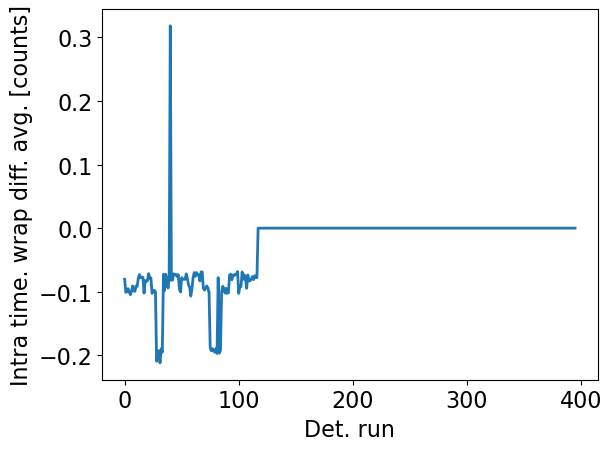

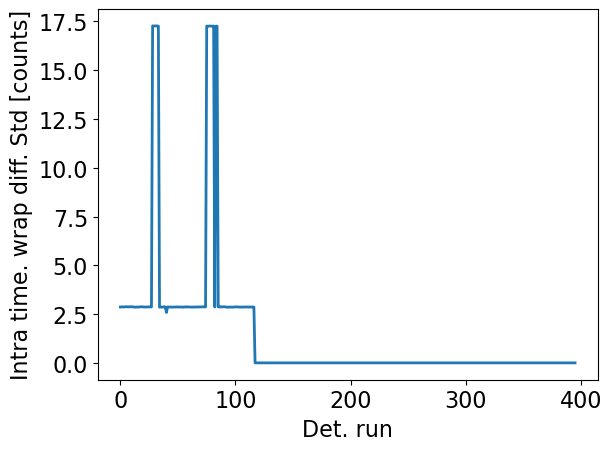

Intra time. wrap diff. avg. [counts]: -0.02824751467171717
Intra time. wrap diff. std [counts]: 1.3911761856313132


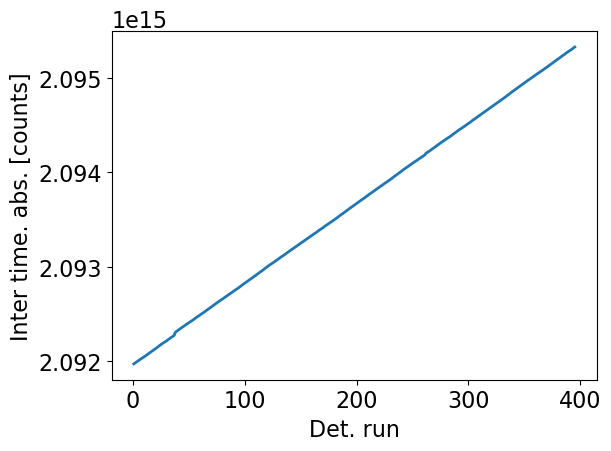

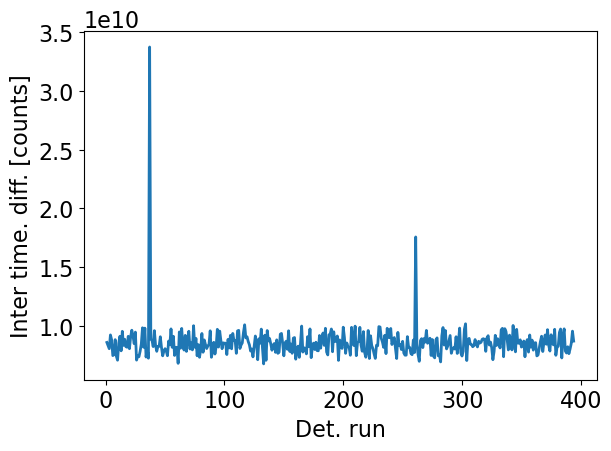

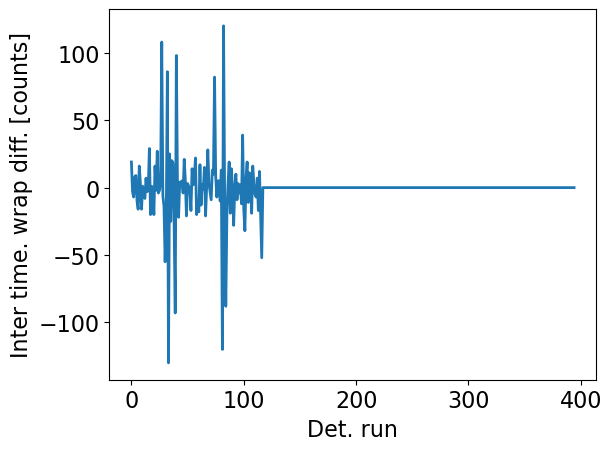

Inter time. wrap diff. avg. [counts]: -0.18734178
Inter time. wrap diff. median [counts]: 0.0
Inter time. wrap diff. std [counts]: 6.4586844


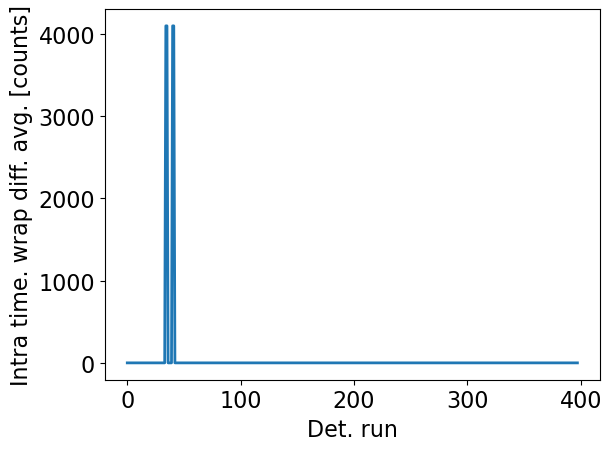

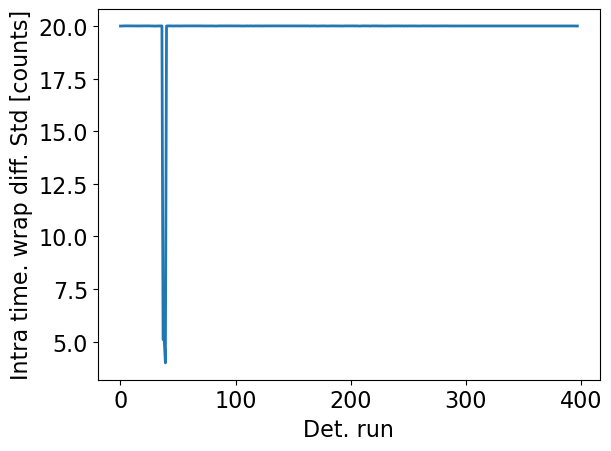

Intra time. wrap diff. avg. [counts]: 41.16624210306532
Intra time. wrap diff. std [counts]: 19.883405300929653


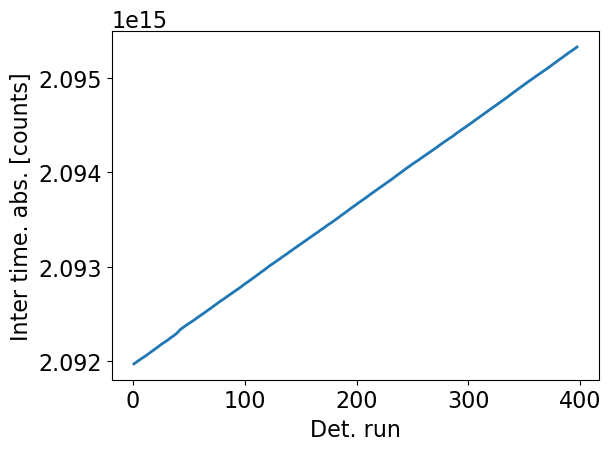

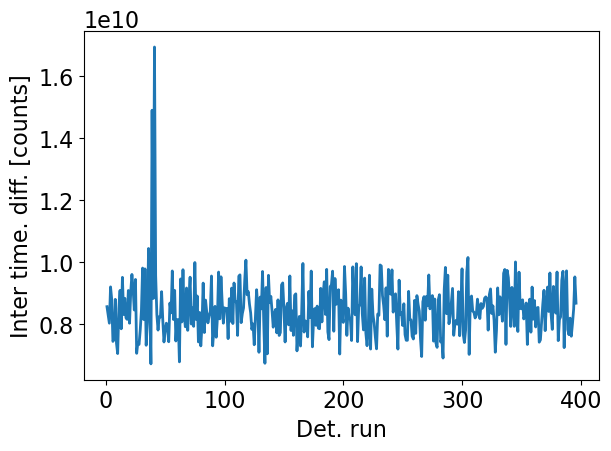

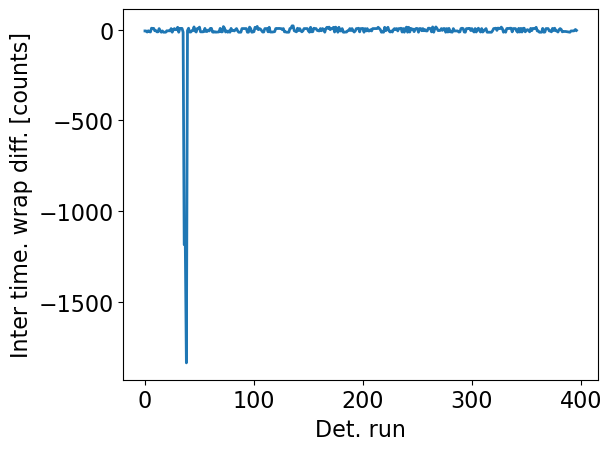

Inter time. wrap diff. avg. [counts]: -12.642318
Inter time. wrap diff. median [counts]: -5.0
Inter time. wrap diff. std [counts]: 9.237029


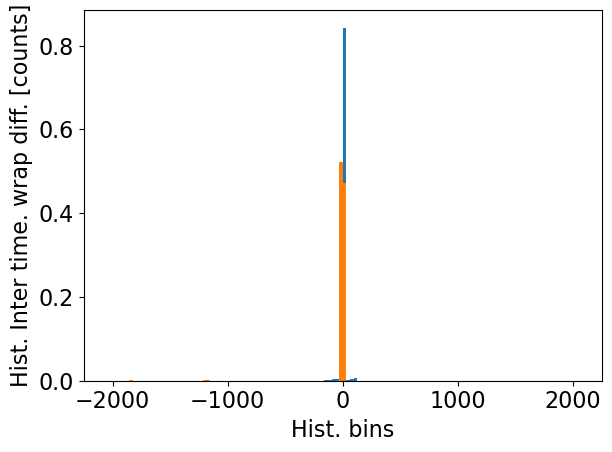

In [14]:
## Synchronization analysis inter and intra runs
# Connect on the timetagg part only channel 1
# It has to be used PRUassTrigSigScriptHist4Sig in PRU1
# Attention TimeTaggsDetAnalytics[5] stores the mean wrap count difference
# Attention TimeTaggsDetAnalytics[6] stores the std wrap count difference
ExtraDetailString='PTP'#'PTPjitter'#'NoPTP'# 'NTP'#'PTP'
HistPeriodicityAux=PeriodSignalHistVal# Histogram analysis periodicity
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode1'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam5=(np.load(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode1'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam5),1),ListStatisticsTimeTaggDetQubitsNodeParam5)
plt.xlabel('Det. run')
plt.ylabel('Intra time. wrap diff. avg. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam6=(np.load(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode1'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam6),1),ListStatisticsTimeTaggDetQubitsNodeParam6)
plt.xlabel('Det. run')
plt.ylabel('Intra time. wrap diff. Std [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

print('Intra time. wrap diff. avg. [counts]: '+str(np.mean(ListStatisticsTimeTaggDetQubitsNodeParam5)))
print('Intra time. wrap diff. std [counts]: '+str(np.mean(ListStatisticsTimeTaggDetQubitsNodeParam6)))

#######################################################################################################
#Inter runs checker of the initial detection in channel 1
# The plot below helps adjust the Threshold value (we should a constantly increasing line - never a decrease jump)
# If the first out of place is a up-bump->threshold value too high
# If the first out of place is a down-bump->threshold value too low
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7),1),ListStatisticsTimeTaggDetQubitsNodeParam7[1:])
plt.xlabel('Det. run')
plt.ylabel('Inter time. abs. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-2,dtype=np.float32)
for iIter in range(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):    
    IntraRunSynchChecker[iIter-1]=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+0]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

## Zero Time Point
#ListStatisticsTimeTaggDetQubitsNodeParam7=ListStatisticsTimeTaggDetQubitsNodeParam7-ListStatisticsTimeTaggDetQubitsNodeParam7[0]

# Checking with wrapping
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):
    # Relative difference
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    # Absolute difference with first tag
    #CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[0*iIter]
    #NumCycles=np.round(CalcAux/HistPeriodicityAux)
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxNode1IntraRunSynchChecker=IntraRunSynchChecker
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

def remove_outliers_func(data, method='std', threshold=1.5):
    """
    Removes outliers from a NumPy array.

    Args:
        data: The input NumPy array.
        method: The method to use for outlier detection. 
                Options: 'iqr' (Interquartile Range), 'std' (Standard Deviation).
                Default: 'iqr'.
        threshold: The threshold for outlier detection. 
                For 'iqr', it's the number of IQRs to consider as outliers.
                For 'std', it's the number of standard deviations to consider as outliers.
                Default: 1.5.

    Returns:
        A NumPy array with outliers removed.
    """

    if method == 'iqr':
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return data[(data >= lower_bound) & (data <= upper_bound)]

    elif method == 'std':
        mean = np.mean(data)
        std_dev = np.std(data)
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
        return data[(data >= lower_bound) & (data <= upper_bound)]

    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'std'.")

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(IntraRunSynchChecker)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(IntraRunSynchChecker)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(remove_outliers_func(IntraRunSynchChecker))))

##############################################################################################################
## Node 2
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode2'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam5=(np.load(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode2'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam5),1),ListStatisticsTimeTaggDetQubitsNodeParam5)
plt.xlabel('Det. run')
plt.ylabel('Intra time. wrap diff. avg. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam6=(np.load(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode2'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam6),1),ListStatisticsTimeTaggDetQubitsNodeParam6)
plt.xlabel('Det. run')
plt.ylabel('Intra time. wrap diff. Std [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

print('Intra time. wrap diff. avg. [counts]: '+str(np.mean(ListStatisticsTimeTaggDetQubitsNodeParam5)))
print('Intra time. wrap diff. std [counts]: '+str(np.mean(ListStatisticsTimeTaggDetQubitsNodeParam6)))

#######################################################################################################
#Inter runs checker of the initial detection in channel 1
# The plot below helps adjust the Threshold value (we should a constantly increasing line - never a decrease jump)
# If the first out of place is a up-bump->threshold value too high
# If the first out of place is a down-bump->threshold value too low
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode2'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7),1),ListStatisticsTimeTaggDetQubitsNodeParam7[1:])
plt.xlabel('Det. run')
plt.ylabel('Inter time. abs. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode2'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-2,dtype=np.float32)
for iIter in range(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):    
    IntraRunSynchChecker[iIter-1]=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+0]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

## Zero Time Point
#ListStatisticsTimeTaggDetQubitsNodeParam7=ListStatisticsTimeTaggDetQubitsNodeParam7-ListStatisticsTimeTaggDetQubitsNodeParam7[0]

# Checking with wrapping
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode2'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):    
    # Relative difference
    #CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    # Absolute difference with first tag
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[0*iIter]
    #NumCycles=np.round(CalcAux/HistPeriodicityAux)
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxNode2IntraRunSynchChecker=IntraRunSynchChecker
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

def remove_outliers_func(data, method='std', threshold=1.5):
    """
    Removes outliers from a NumPy array.

    Args:
        data: The input NumPy array.
        method: The method to use for outlier detection. 
                Options: 'iqr' (Interquartile Range), 'std' (Standard Deviation).
                Default: 'iqr'.
        threshold: The threshold for outlier detection. 
                For 'iqr', it's the number of IQRs to consider as outliers.
                For 'std', it's the number of standard deviations to consider as outliers.
                Default: 1.5.

    Returns:
        A NumPy array with outliers removed.
    """

    if method == 'iqr':
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return data[(data >= lower_bound) & (data <= upper_bound)]

    elif method == 'std':
        mean = np.mean(data)
        std_dev = np.std(data)
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
        return data[(data >= lower_bound) & (data <= upper_bound)]

    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'std'.")

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(IntraRunSynchChecker)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(IntraRunSynchChecker)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(remove_outliers_func(IntraRunSynchChecker))))

# Histogram analysis
# Define the number of bins and periodicity
num_bins = 8
periodicity = HistPeriodicityAux

# Calculate the bins edges
bin_edges = np.linspace(-periodicity/2, periodicity/2, 16*num_bins+1)

# Calculate bin centers from edges for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Generate histogram data with normalization
hist1, bins1 = np.histogram(HistAuxNode1IntraRunSynchChecker, bins=bin_edges, density=True)
hist2, bins2 = np.histogram(HistAuxNode2IntraRunSynchChecker, bins=bin_edges, density=True)

plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.bar(bin_centers, hist1/np.sum(hist1),width=(bin_edges[1] - bin_edges[0]))#, density=True)
plt.bar(bin_centers, hist2/np.sum(hist2),width=(bin_edges[1] - bin_edges[0]))#, density=True)
plt.xlabel('Hist. bins')
plt.ylabel('Hist. Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
plt.savefig(pathScriptData+'MeasHistSynchTwoChannel.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

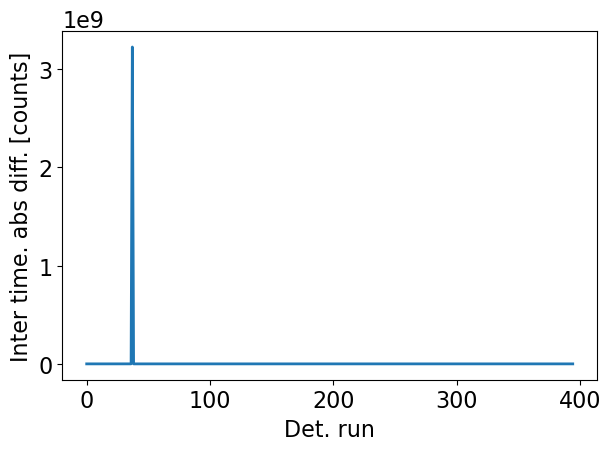

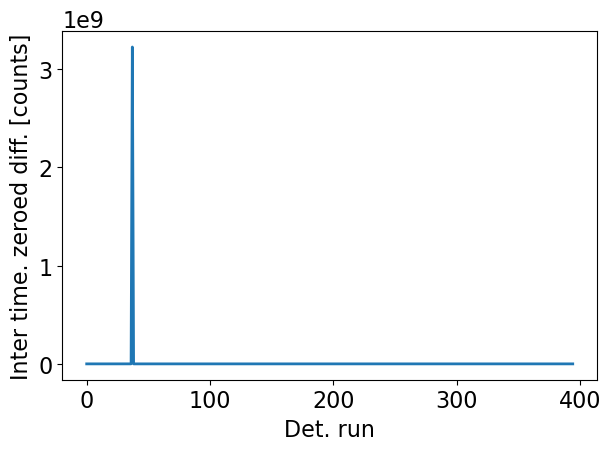

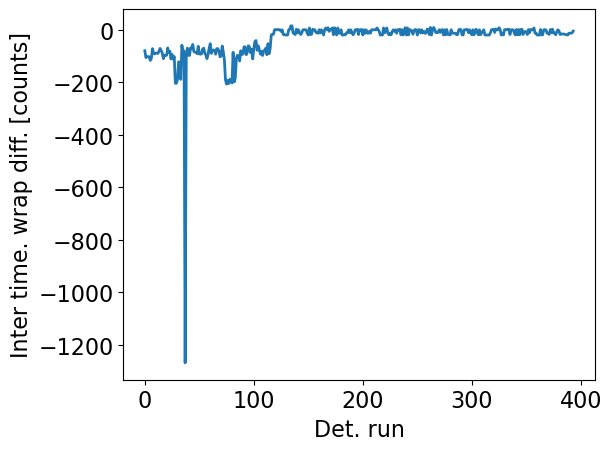

Inter time. wrap diff. avg. [counts]: -37.22335
Inter time. wrap diff. median [counts]: -13.0
Inter time. wrap diff. std [counts]: 36.76813


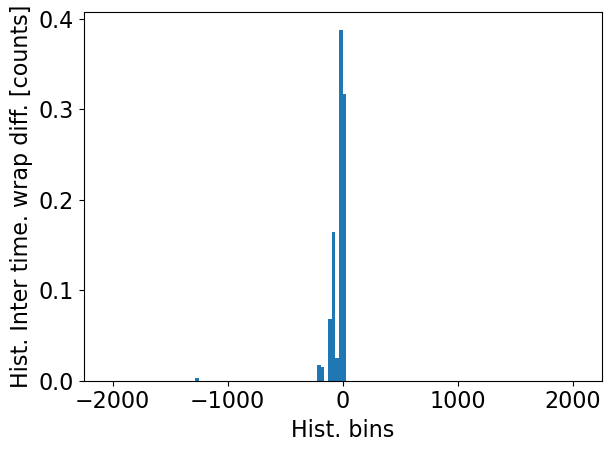

In [15]:
###### Analysis between timetaggs
### Node 1 vs. Node 2
ExtraDetailString='PTP'#'PTPjitter'#'NoPTP'# 'NTP'#'PTP'
HistPeriodicityAux=PeriodSignalHistVal# Histogram analysis periodicity
ListNumStoredQubitsNode1=np.load(pathScriptData+'DealerListNumStoredQubitsNode1'+ExtraDetailString+'.npy')
ListNumStoredQubitsNode2=np.load(pathScriptData+'DealerListNumStoredQubitsNode2'+ExtraDetailString+'.npy')

# Get the detection runs where both detected
NonZeroIndecesNodeDet=np.where((ListNumStoredQubitsNode1 != 0.0) & (ListNumStoredQubitsNode2 != 0.0))[0]

ListStatisticsTimeTaggDetQubitsNode1Param7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString+'.npy'))[NonZeroIndecesNodeDet]
ListStatisticsTimeTaggDetQubitsNode2Param7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode2'+ExtraDetailString+'.npy'))[NonZeroIndecesNodeDet]

IntraRunSynchChecker=np.zeros(len(NonZeroIndecesNodeDet),dtype=np.float32)
for iIter in range(0,len(NonZeroIndecesNodeDet),1):  
    IntraRunSynchChecker[iIter]=ListStatisticsTimeTaggDetQubitsNode2Param7[iIter]-ListStatisticsTimeTaggDetQubitsNode1Param7[iIter]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(NonZeroIndecesNodeDet),1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. abs diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

# Set 0 time point - otherwise probably a initial cross correlation will be needed or adjust better the PTP filtering
#ListStatisticsTimeTaggDetQubitsNode1Param7=ListStatisticsTimeTaggDetQubitsNode1Param7-ListStatisticsTimeTaggDetQubitsNode1Param7[0]
#ListStatisticsTimeTaggDetQubitsNode2Param7=ListStatisticsTimeTaggDetQubitsNode2Param7-ListStatisticsTimeTaggDetQubitsNode2Param7[0]

IntraRunSynchChecker=np.zeros(len(NonZeroIndecesNodeDet),dtype=np.float32)
for iIter in range(0,len(NonZeroIndecesNodeDet),1):
    CalcAux=ListStatisticsTimeTaggDetQubitsNode2Param7[iIter]-ListStatisticsTimeTaggDetQubitsNode1Param7[iIter]
    IntraRunSynchChecker[iIter]=CalcAux
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(NonZeroIndecesNodeDet),1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. zeroed diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

#print('Inter time. diff. avg. [counts]: '+str(np.mean(IntraRunSynchChecker)))
#print('Inter time. diff. median [counts]: '+str(np.median(IntraRunSynchChecker)))
#print('Inter time. diff. std [counts]: '+str(np.std(IntraRunSynchChecker)))

#ListStatisticsTimeTaggDetQubitsNode1Param7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString+'.npy'))[NonZeroIndecesNodeDet]
#ListStatisticsTimeTaggDetQubitsNode2Param7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode2'+ExtraDetailString+'.npy'))[NonZeroIndecesNodeDet]

# The offset can be computed with the previous value
IntraRunSynchChecker=np.zeros(len(NonZeroIndecesNodeDet)-1-0,dtype=np.float32)
for iIter in range(0+0,len(NonZeroIndecesNodeDet)-1-0,1):
    # Relative difference
    #CalcAux=(ListStatisticsTimeTaggDetQubitsNode2Param7[iIter+1]-ListStatisticsTimeTaggDetQubitsNode2Param7[iIter])-(ListStatisticsTimeTaggDetQubitsNode1Param7[iIter+1]-ListStatisticsTimeTaggDetQubitsNode1Param7[iIter])
    # Absolute difference
    CalcAux=ListStatisticsTimeTaggDetQubitsNode2Param7[iIter]-ListStatisticsTimeTaggDetQubitsNode1Param7[iIter]
    IntraRunSynchChecker[iIter-0]=np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0
    #if (iIter>0):
    #    #print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[1*iIter-1])
    #    print(CalcAux)
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(NonZeroIndecesNodeDet)-1-0,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

def remove_outliers_func(data, method='std', threshold=1.5):
    """
    Removes outliers from a NumPy array.

    Args:
        data: The input NumPy array.
        method: The method to use for outlier detection. 
                Options: 'iqr' (Interquartile Range), 'std' (Standard Deviation).
                Default: 'iqr'.
        threshold: The threshold for outlier detection. 
                For 'iqr', it's the number of IQRs to consider as outliers.
                For 'std', it's the number of standard deviations to consider as outliers.
                Default: 1.5.

    Returns:
        A NumPy array with outliers removed.
    """

    if method == 'iqr':
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return data[(data >= lower_bound) & (data <= upper_bound)]

    elif method == 'std':
        mean = np.mean(data)
        std_dev = np.std(data)
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
        return data[(data >= lower_bound) & (data <= upper_bound)]

    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'std'.")

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(IntraRunSynchChecker)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(IntraRunSynchChecker)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(remove_outliers_func(IntraRunSynchChecker))))

# Histogram analysis
# Define the number of bins and periodicity
num_bins = 8
periodicity = HistPeriodicityAux

# Calculate the bins edges
bin_edges = np.linspace(-periodicity/2, periodicity/2, 16*num_bins+1)

# Calculate bin centers from edges for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Generate histogram data with normalization
hist, bins = np.histogram(IntraRunSynchChecker, bins=bin_edges, density=True)

plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.bar(bin_centers, hist/np.sum(hist),width=(bin_edges[1] - bin_edges[0]))#, density=True)
plt.xlabel('Hist. bins')
plt.ylabel('Hist. Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
plt.savefig(pathScriptData+'MeasHistSynchInterChannel.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

In [ ]:
####### Debbuging synch intra runs
# The GPIO c++ unskewing and threshold values are set to zero
# Only channel 1 is connected
# PRU1 PRUassTrigSigScriptHist4Sig.p is used
# PTP protocol better enabled
# Tags statistics  in QPhysLayer c++ is modified to this particular case

In [ ]:
import time
import random
NumTestMax = 5
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    SynchPRUoffFreqVal=np.asarray([0.0,0.0])# Double value to adjust synch signals offset and frequency for each quantum channel
    TestPeriodFactorAux=1.0 # (Sub)Power of 2!
    PeriodSignalHistVal=4096.0/TestPeriodFactorAux# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536*TestPeriodFactorAux # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    # Request to Client:
    #QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
    #argsPayloadBlockUnblockList=[IPhostClientOpNet]
    #QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    #QPLAagent.SimulateRequestQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    # Sending request to Server:
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

In [ ]:
# Save generated data
#print(os.getcwd())
ExtraDetailString='PTP'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

In [ ]:
## Synchronization analysis inter and intra runs
# Connect on the timetagg part only channel 1
# It has to be used PRUassTrigSigScriptHist4Sig in PRU1
# Attention TimeTaggsDetAnalytics[5] stores the mean wrap count difference
# Attention TimeTaggsDetAnalytics[6] stores the std wrap count difference
ExtraDetailString='PTP'#'NoPTP'# 'NTP'#'PTP'
HistPeriodicityAux=PeriodSignalHistVal# Histogram analysis periodicity
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam5=(np.load(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam5),1),ListStatisticsTimeTaggDetQubitsNodeParam5)
plt.xlabel('Det. run')
plt.ylabel('Intra time. wrap diff. avg. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam6=(np.load(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam6),1),ListStatisticsTimeTaggDetQubitsNodeParam6)
plt.xlabel('Det. run')
plt.ylabel('Intra time. wrap diff. Std [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

print('Intra time. wrap diff. avg. [counts]: '+str(np.mean(ListStatisticsTimeTaggDetQubitsNodeParam5)))
print('Intra time. wrap diff. median [counts]: '+str(np.median(ListStatisticsTimeTaggDetQubitsNodeParam5)))
print('Intra time. wrap diff. std [counts]: '+str(np.mean(ListStatisticsTimeTaggDetQubitsNodeParam6)))

# Histogram analysis
# Define the number of bins and periodicity
num_bins = 8
periodicity = HistPeriodicityAux

# Calculate the bins edges
bin_edges = np.linspace(-periodicity/2, periodicity/2, 32*num_bins+1)

# Calculate bin centers from edges for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Generate histogram data with normalization
hist, bins = np.histogram(ListStatisticsTimeTaggDetQubitsNodeParam5, bins=bin_edges, density=True)

plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.bar(bin_centers, hist/np.sum(hist),width=(bin_edges[1] - bin_edges[0]))#, density=True)
plt.xlabel('Hist. bins')
plt.ylabel('Hist. Intra time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

#######################################################################################################
#Inter runs checker of the initial detection in channel 1
# The plot below helps adjust the Threshold value (we should a constantly increasing line - never a decrease jump)
# If the first out of place is a up-bump->threshold value too high
# If the first out of place is a down-bump->threshold value too low
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7),1),ListStatisticsTimeTaggDetQubitsNodeParam7[1:])
plt.xlabel('Det. run')
plt.ylabel('Inter time. abs. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-2,dtype=np.float32)
for iIter in range(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):    
    IntraRunSynchChecker[iIter-1]=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[iIter]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

# Checking with wrapping
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):    
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    NumCycles=np.round(CalcAux/HistPeriodicityAux)
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #print(CalcAux/NumCycles)
    #if (iIter>0):
    #    print('CalcAux: '+str(CalcAux-HistPeriodicityAux*NumCycles))
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter-1])
HistAuxIntraRunSynchChecker=IntraRunSynchChecker
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

def remove_outliers_func(data, method='std', threshold=1.5):
    """
    Removes outliers from a NumPy array.

    Args:
        data: The input NumPy array.
        method: The method to use for outlier detection. 
                Options: 'iqr' (Interquartile Range), 'std' (Standard Deviation).
                Default: 'iqr'.
        threshold: The threshold for outlier detection. 
                For 'iqr', it's the number of IQRs to consider as outliers.
                For 'std', it's the number of standard deviations to consider as outliers.
                Default: 1.5.

    Returns:
        A NumPy array with outliers removed.
    """

    if method == 'iqr':
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return data[(data >= lower_bound) & (data <= upper_bound)]

    elif method == 'std':
        mean = np.mean(data)
        std_dev = np.std(data)
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
        return data[(data >= lower_bound) & (data <= upper_bound)]

    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'std'.")

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(IntraRunSynchChecker)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(IntraRunSynchChecker)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(remove_outliers_func(IntraRunSynchChecker))))

# Histogram analysis
# Define the number of bins and periodicity
num_bins = 8
periodicity = HistPeriodicityAux

# Calculate the bins edges
bin_edges = np.linspace(-periodicity/2, periodicity/2, 16*num_bins+1)

# Calculate bin centers from edges for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Generate histogram data with normalization
hist, bins = np.histogram(HistAuxIntraRunSynchChecker, bins=bin_edges, density=True)

plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.bar(bin_centers, hist/np.sum(hist),width=(bin_edges[1] - bin_edges[0]))#, density=True)
plt.xlabel('Hist. bins')
plt.ylabel('Hist. Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

In [ ]:
# Executing multi-step synch protocol
# Activated the option to make it iterative, so that after some iterations converges
# At least the below mechanism has to be run with each respective remote node of each node
# Nevertheless, it will be automatically implemtented with a host level scheduler in the future

In [ ]:
# Trying to retrieve automatically the synch parameters between connected nodes
import time
OffsetSitAux=0.0
RelFreqOffsetSitAux=0.0
SynchPRUoffFreqVal=np.asarray([OffsetSitAux,RelFreqOffsetSitAux]) # Tests offsets and frequencies
TestPeriodFactorAux=0.25 # (Sub)Power of 2!
PeriodSignalHistVal=4096.0/TestPeriodFactorAux# Histogram/Period sending/receiving signals. Power of 2!
NumRequestedQubitsSend=65536*TestPeriodFactorAux # Qubits to send
NumRequestedQubitsReceive=1964# Qubits signals to detect
NumRunsPerCenterMass=6 # Number of averaging runs per synch test frequency (the total number of test is this number multiplied by the number of synch test frequencies - which the latter determines the number of synch parameteres retrieved)
SynchFreqPRUarrayTest=np.asarray([0.0])#,-0.25,0.25]) # These values are the normalized relative frequency difference to execute thhe mechanism of synchronization
# Applying routine with one remote node
ListRetrievedSynchParamsNode=[]
# Sending request
QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
argsPayloadBlockUnblockList=[IPhostClientOpNet]
QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
QPLAagent.SimulateRequestSynchsHost(IPhostClientOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,NumRunsPerCenterMass,SynchFreqPRUarrayTest,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
time.sleep(5.0)# Give some extra time
SynchParamsNode = np.zeros(3, dtype=np.double)# equivalnet to float64 for C like arrays
QPLAagent.SimulateRetrieveSynchParamsNode(IPnodeDealerConNet,IPhostDealerConNet,SynchParamsNode) # Supposing that node has received quBits, return retrieved synch params
QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
ListRetrievedSynchParamsNode.append(SynchParamsNode[0])
ListRetrievedSynchParamsNode.append(SynchParamsNode[1])
ListRetrievedSynchParamsNode.append(SynchParamsNode[2])
print('ListRetrievedSynchParamsNode: '+str(ListRetrievedSynchParamsNode))
time.sleep(15.0)
# Applying routine with the other remote node
ListRetrievedSynchParamsNode=[]
# Sending request
QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
argsPayloadBlockUnblockList=[IPhostServerOpNet]
QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
QPLAagent.SimulateRequestSynchsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,NumRunsPerCenterMass,SynchFreqPRUarrayTest,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
time.sleep(5.0)# Give some extra time
SynchParamsNode = np.zeros(3, dtype=np.double)# equivalnet to float64 for C like arrays
QPLAagent.SimulateRetrieveSynchParamsNode(IPnodeDealerConNet,IPhostDealerConNet,SynchParamsNode) # Supposing that node has received quBits, return retrieved synch params
QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
ListRetrievedSynchParamsNode.append(SynchParamsNode[0]) 
ListRetrievedSynchParamsNode.append(SynchParamsNode[1])
ListRetrievedSynchParamsNode.append(SynchParamsNode[2])
print('ListRetrievedSynchParamsNode: '+str(ListRetrievedSynchParamsNode))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPmultiStepSynch'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListRetrievedSynchParamsNode'+ExtraDetailString,ListRetrievedSynchParamsNode)

In [ ]:
## Dealer as common node - Entanglement interference analysis
# Only channel 1 is connected
# PRU1 PRUassTrigSigScriptHist4Sig.p is used
# PTP protocol better enabled
# Tags statistics in QPhysLayer c++ is modified to this particular case!

In [9]:
import random
import time
NumTestMax = 350
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
for iIterTest in range(0,NumTestMax,1):
    # Sending Entangled QuBits
    QuadChEmtDet=np.asarray([1,2,3]) # Emit, Emit, Detect
    TestPeriodFactorAux=1.0 # (Sub)Power of 2!
    PeriodSignalHistVal=4096.0/TestPeriodFactorAux# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536*TestPeriodFactorAux # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    SynchPRUoffFreqVal1=np.asarray([0.0,0.0])# Double value to adjust synch signals offset and frequency for each quantum channel
    SynchPRUoffFreqVal2=np.asarray([0.0,0.0])# Double value to adjust synch signals offset and frequency for each quantum channel
    argsPayloadBlockUnblockList=[IPhostClientOpNet,IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestMultipleNodesQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPnodeClientConNet,IPnodeServerConNet,IPhostDealerConNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal1,SynchPRUoffFreqVal2,QuadChEmtDet) # Request that the other nodes of the specified hosts get ready to receive entangled qubits from the dealer's node
    time.sleep(5.0)# Give time to receive qubits before requesting them
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(20.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

ListNumStoredQubitsNode: [1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 19

In [10]:
# Save generated data
#print(os.getcwd())
ExtraDetailString='PTP'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

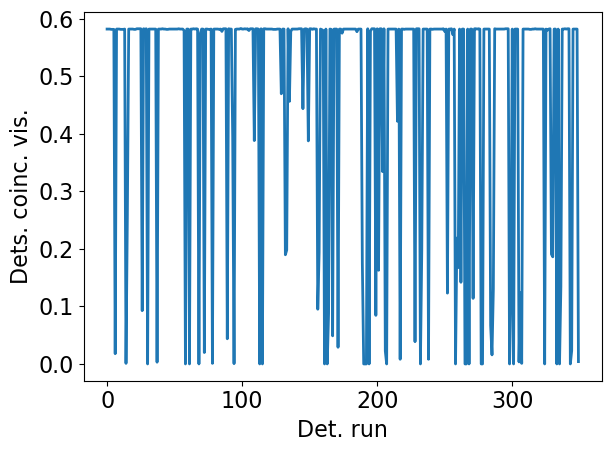

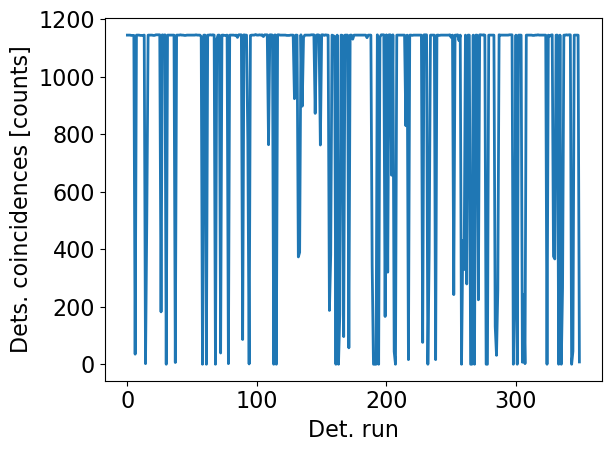

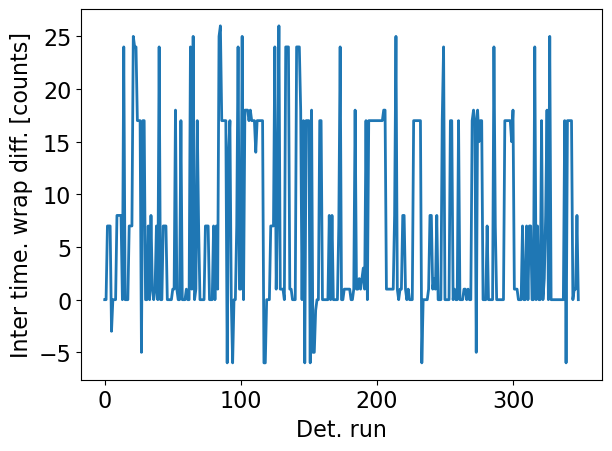

Inter time. wrap diff. avg. [counts]: 6.6733522
Inter time. wrap diff. median [counts]: 1.0
Inter time. wrap diff. std [counts]: 7.3888364


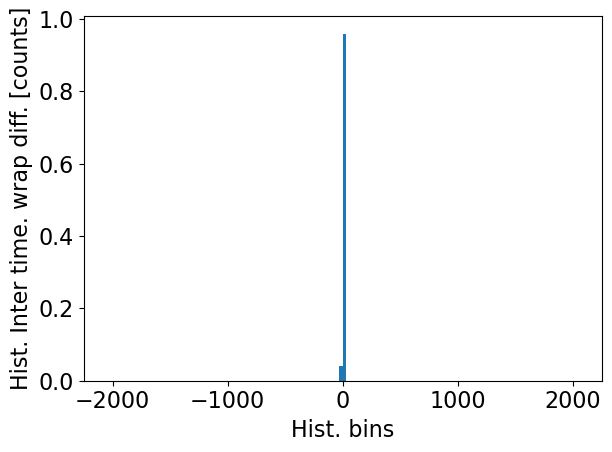

In [11]:
# Analysis of interference - Visibility & Coincidence
# It has to be used PRUassTrigSigScriptHist4Sig in PRU1
# Attention TimeTaggsDetAnalytics[4] stores the multiple coincides in all channels
ExtraDetailString='PTP'#'NoPTP'# 'NTP'#'PTP'
HistPeriodicityAux=PeriodSignalHistVal# Histogram analysis periodicity
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsNode'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListNumStoredQubitsNode=ListNumStoredQubitsNode[NonZeroIndecesDet]
ListStatisticsTimeTaggDetQubitsNodeParam4=(np.load(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsMultiNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]

plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(ListStatisticsTimeTaggDetQubitsNodeParam4/ListNumStoredQubitsNode)
plt.xlabel('Det. run')
plt.ylabel('Dets. coinc. vis.')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
plt.savefig(pathScriptData+'MeasInterferenceVis4Channel.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(ListStatisticsTimeTaggDetQubitsNodeParam4)
plt.xlabel('Det. run')
plt.ylabel('Dets. coincidences [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
plt.savefig(pathScriptData+'MeasInterferenceCoincidence4Channel.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

# Checking with wrapping
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerMultiInterferenceListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):    
    # Relative difference
    #CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    # Absolute difference with first tag
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[0*iIter]
    #NumCycles=np.round(CalcAux/HistPeriodicityAux)
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxNodeIntraRunSynchChecker=IntraRunSynchChecker
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

def remove_outliers_func(data, method='std', threshold=1.5):
    """
    Removes outliers from a NumPy array.

    Args:
        data: The input NumPy array.
        method: The method to use for outlier detection. 
                Options: 'iqr' (Interquartile Range), 'std' (Standard Deviation).
                Default: 'iqr'.
        threshold: The threshold for outlier detection. 
                For 'iqr', it's the number of IQRs to consider as outliers.
                For 'std', it's the number of standard deviations to consider as outliers.
                Default: 1.5.

    Returns:
        A NumPy array with outliers removed.
    """

    if method == 'iqr':
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return data[(data >= lower_bound) & (data <= upper_bound)]

    elif method == 'std':
        mean = np.mean(data)
        std_dev = np.std(data)
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
        return data[(data >= lower_bound) & (data <= upper_bound)]

    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'std'.")

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(IntraRunSynchChecker)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(IntraRunSynchChecker)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(remove_outliers_func(IntraRunSynchChecker))))

# Histogram analysis
# Define the number of bins and periodicity
num_bins = 8
periodicity = HistPeriodicityAux

# Calculate the bins edges
bin_edges = np.linspace(-periodicity/2, periodicity/2, 16*num_bins+1)

# Calculate bin centers from edges for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Generate histogram data with normalization
hist1, bins1 = np.histogram(HistAuxNodeIntraRunSynchChecker, bins=bin_edges, density=True)
#hist2, bins2 = np.histogram(HistAuxNode2IntraRunSynchChecker, bins=bin_edges, density=True)

plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.bar(bin_centers, hist1/np.sum(hist1),width=(bin_edges[1] - bin_edges[0]))#, density=True)
#plt.bar(bin_centers, hist2/np.sum(hist2),width=(bin_edges[1] - bin_edges[0]))#, density=True)
plt.xlabel('Hist. bins')
plt.ylabel('Hist. Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
plt.savefig(pathScriptData+'MeasHistSynchCoincChannel.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

In [ ]:
####### Testing multi-step offset variation synch protocol
# The GPIO c++ unskewing and threshold values are set to zero
# Only channel 1 is connected
# PRU1 PRUassTrigSigScriptHist4Sig.p is used
# PTP protocol better enabled
# Tags statistics  in QPhysLayer c++ is modified to this particular case
# In QPLA turn ApplyProcQubitsSmallTimeOffsetContinuousCorrection to false

In [ ]:
import time
NumTestMax = 250
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    SynchPRUoffFreqVal=np.asarray([0.0,FreqPRUarrayTest[int(np.floor(iIterTest/(NumTestMax/len(FreqPRUarrayTest))))]])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    
    QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
    argsPayloadBlockUnblockList=[IPhostClientOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    
    #QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
    #argsPayloadBlockUnblockList=[IPhostServerOpNet]
    #QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    #QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    #NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    #StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    #QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    #QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

In [ ]:
# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

In [ ]:
## Synchronization analysis inter and intra runs
# Connect on the timetagg part only channel 1
# It has to be used PRUassTrigSigScriptHist4Sig in PRU1
# Attention TimeTaggsDetAnalytics[5] stores the mean wrap count difference
# Attention TimeTaggsDetAnalytics[6] stores the std wrap count difference
ExtraDetailString='PTPfreqHist'#'NoPTP'# 'NTP'#'PTP'
HistPeriodicityAux=PeriodSignalHistVal# Histogram analysis periodicity
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam5=(np.load(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam5),1),ListStatisticsTimeTaggDetQubitsNodeParam5)
plt.xlabel('Det. run')
plt.ylabel('Intra time. wrap diff. avg. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam6=(np.load(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam6),1),ListStatisticsTimeTaggDetQubitsNodeParam6)
plt.xlabel('Det. run')
plt.ylabel('Intra time. wrap diff. Std [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

print('Intra time. wrap diff. avg. [counts]: '+str(np.mean(ListStatisticsTimeTaggDetQubitsNodeParam5)))
print('Intra time. wrap diff. median [counts]: '+str(np.median(ListStatisticsTimeTaggDetQubitsNodeParam5)))
print('Intra time. wrap diff. std [counts]: '+str(np.mean(ListStatisticsTimeTaggDetQubitsNodeParam6)))

# Histogram analysis
# Define the number of bins and periodicity
num_bins = 8
periodicity = HistPeriodicityAux

# Calculate the bins edges
bin_edges = np.linspace(-periodicity/2, periodicity/2, 32*num_bins+1)

# Calculate bin centers from edges for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Generate histogram data with normalization
hist, bins = np.histogram(ListStatisticsTimeTaggDetQubitsNodeParam5, bins=bin_edges, density=True)

plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.bar(bin_centers, hist/np.sum(hist),width=(bin_edges[1] - bin_edges[0]))#, density=True)
plt.xlabel('Hist. bins')
plt.ylabel('Hist. Intra time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

#Inter runs checker of the initial detection in channel 1
# The plot below helps adjust the Threshold value (we should a constantly increasing line - never a decrease jump)
# If the first out of place is a up-bump->threshold value too high
# If the first out of place is a down-bump->threshold value too low
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(1,len(ListStatisticsTimeTaggDetQubitsNodeParam7),1),ListStatisticsTimeTaggDetQubitsNodeParam7[1:])
plt.xlabel('Det. run')
plt.ylabel('Inter time. abs. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):    
    IntraRunSynchChecker[iIter]=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[0*iIter]
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[0*iIter]
    #print('CalcAux: '+str(CalcAux))
    NumCycles=np.round(CalcAux/HistPeriodicityAux)
    #print('NumCycles: '+str(NumCycles))
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #print('IntraRunSynchChecker[iIter]: '+str(IntraRunSynchChecker[iIter]))
    #print(CalcAux/NumCycles)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxIntraRunSynchChecker=IntraRunSynchChecker
plt.figure()#figsize=(8.0, 4.0))
ax = plt.gca()
plt.plot(np.arange(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1),IntraRunSynchChecker)
plt.xlabel('Det. run')
plt.ylabel('Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.tight_layout()
#plt.savefig(pathScriptData+'TheorLOSvsNLOS.pdf', bbox_inches='tight', format = 'pdf', dpi = 300 )#dpi = 600 )
plt.show()

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(IntraRunSynchChecker)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(IntraRunSynchChecker)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(IntraRunSynchChecker)))

# Histogram analysis
# Define the number of bins and periodicity
num_bins = 8
periodicity = HistPeriodicityAux

# Calculate the bins edges
bin_edges = np.linspace(-periodicity/2, periodicity/2, 16*num_bins+1)

# Calculate bin centers from edges for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Generate histogram data with normalization
hist, bins = np.histogram(HistAuxIntraRunSynchChecker, bins=bin_edges, density=True)

num_macro_bins= 3
colors_array=['indigo','blue','darkgreen']

### Generate nice legend
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('figure', figsize=[6.4, 4.8])     # controls default Fgiure size. Default is [6.4, 4.8]
plt.rc('figure', autolayout = True)      # code will produce the same graphs on differently-configured machines
plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=1) # line width
plt.rc('lines', markersize=6) # marker size

lineArray=[]# List
plt.figure(figsize=(6.4, 4.8))
ax = plt.gca()
for iIterMacroBins in range(num_macro_bins):
    lineAux=plt.bar(bin_centers[int((iIterMacroBins)*(len(bin_centers)/num_macro_bins)):int((iIterMacroBins+1)*(len(bin_centers)/num_macro_bins))], hist[int((iIterMacroBins)*(len(hist)/num_macro_bins)):int((iIterMacroBins+1)*(len(hist)/num_macro_bins))]/np.sum(hist[int((iIterMacroBins)*(len(hist)/num_macro_bins)):int((iIterMacroBins+1)*(len(hist)/num_macro_bins))]),width=(bin_edges[1] - bin_edges[0]),color=colors_array[iIterMacroBins])
    lineArray.append(lineAux)
plt.xlabel('Hist. bins')
plt.ylabel('Hist. Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.legend((lineArray[0],lineArray[1],lineArray[2]),('Meas. Freq. 1','Meas. Freq. 2','Meas. Freq. 3'),loc="best",shadow=False,fancybox=False,frameon=False,fontsize='small')
plt.tight_layout()
plt.savefig(pathScriptData+'MeasHistSynchProtAux.eps', bbox_inches='tight', format = 'eps', dpi = 300 )#dpi = 600 )
plt.show()

GeneralSettingsPlots()

In [ ]:
####### Performance multi-step offset variation synch protocol
# The GPIO c++ unskewing and threshold values are set to zero
# Only channel 1 is connected
# PRU1 PRUassTrigSigScriptHist4Sig.p is used
# PTP protocol better enabled
# Tags statistics  in QPhysLayer c++ is modified to this particular case
# In QPLA turn ApplyProcQubitsSmallTimeOffsetContinuousCorrection to false

In [ ]:
# Trying to retrieve different situations of offset, and relative frequency offset with respect none of them present
# Situation 1: No offset and no relative frequency offset - calculated in the cells above as ExtraDetailString='PTP'
# Situation 2: A certain offset but no relative frequency offset
# Situation 3: Offset and relative frequency offset present
import time
NumTestMax = 500
# Situation 2: Offset but no relative frequency offset
OffsetSit2=0.25
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit2,0])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation2Hist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

# Applying routine
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit2,FreqPRUarrayTest[int(np.floor(iIterTest/(NumTestMax/len(FreqPRUarrayTest))))]])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation2routineHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)


# Situation 3: Offset and relative frequency offset
OffsetSit3=0.25
RelFreqOffsetSit3=0.25
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit3,RelFreqOffsetSit3])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation3Hist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

# Applying routine
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit3,RelFreqOffsetSit3+FreqPRUarrayTest[int(np.floor(iIterTest/(NumTestMax/len(FreqPRUarrayTest))))]])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation3routineHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

In [ ]:
## Analysis of the 3 situations regarding synch offset and relative frequency offset
# Connect on the timetagg part only channel 1
# It has to be used PRUassTrigSigScriptHist4Sig in PRU1
# Attention TimeTaggsDetAnalytics[5] stores the mean wrap count difference
# Attention TimeTaggsDetAnalytics[6] stores the std wrap count difference

HistPeriodicityAux=PeriodSignalHistVal# Histogram analysis periodicity

###################################################
# Situation 1
ExtraDetailString='PTP'
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode1'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode1'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    #print('CalcAux: '+str(CalcAux))
    NumCycles=np.round(CalcAux/HistPeriodicityAux)
    #print('NumCycles: '+str(NumCycles))
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #print('IntraRunSynchChecker[iIter]: '+str(IntraRunSynchChecker[iIter]))
    #print(CalcAux/NumCycles)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxIntraRunSynchCheckerSit1=IntraRunSynchChecker

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(HistAuxIntraRunSynchCheckerSit1)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(HistAuxIntraRunSynchCheckerSit1)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(HistAuxIntraRunSynchCheckerSit1)))

####################################################
# Situation 2
ExtraDetailString='PTPfreqOffsetSituation2Hist'
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    #print('CalcAux: '+str(CalcAux))
    NumCycles=np.round(CalcAux/HistPeriodicityAux)
    #print('NumCycles: '+str(NumCycles))
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #print('IntraRunSynchChecker[iIter]: '+str(IntraRunSynchChecker[iIter]))
    #print(CalcAux/NumCycles)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxIntraRunSynchCheckerSit2=IntraRunSynchChecker

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(HistAuxIntraRunSynchCheckerSit2)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(HistAuxIntraRunSynchCheckerSit2)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(HistAuxIntraRunSynchCheckerSit2)))


ExtraDetailString='PTPfreqOffsetSituation2routineHist'
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    #print('CalcAux: '+str(CalcAux))
    NumCycles=np.round(CalcAux/HistPeriodicityAux)
    #print('NumCycles: '+str(NumCycles))
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #print('IntraRunSynchChecker[iIter]: '+str(IntraRunSynchChecker[iIter]))
    #print(CalcAux/NumCycles)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxIntraRunSynchCheckerSit2routine=IntraRunSynchChecker
HistAuxIntraRunSynchCheckerSit2Corrected=HistAuxIntraRunSynchCheckerSit2routine

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(HistAuxIntraRunSynchCheckerSit2Corrected)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(HistAuxIntraRunSynchCheckerSit2Corrected)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(HistAuxIntraRunSynchCheckerSit2Corrected)))

#####################################################
# Situation 3
ExtraDetailString='PTPfreqOffsetSituation3Hist'
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    #print('CalcAux: '+str(CalcAux))
    NumCycles=np.round(CalcAux/HistPeriodicityAux)
    #print('NumCycles: '+str(NumCycles))
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #print('IntraRunSynchChecker[iIter]: '+str(IntraRunSynchChecker[iIter]))
    #print(CalcAux/NumCycles)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxIntraRunSynchCheckerSit3=IntraRunSynchChecker

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(HistAuxIntraRunSynchCheckerSit3)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(HistAuxIntraRunSynchCheckerSit3)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(HistAuxIntraRunSynchCheckerSit3)))

ExtraDetailString='PTPfreqOffsetSituation3routineHist'
ListNumStoredQubitsNode=np.load(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString+'.npy')
NonZeroIndecesDet=np.where(ListNumStoredQubitsNode>0)[0]
ListStatisticsTimeTaggDetQubitsNodeParam7=(np.load(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString+'.npy'))[NonZeroIndecesDet]
IntraRunSynchChecker=np.zeros(len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,dtype=np.float32)
for iIter in range(0,len(ListStatisticsTimeTaggDetQubitsNodeParam7)-1,1):
    CalcAux=ListStatisticsTimeTaggDetQubitsNodeParam7[iIter+1]-ListStatisticsTimeTaggDetQubitsNodeParam7[1*iIter]
    #print('CalcAux: '+str(CalcAux))
    NumCycles=np.round(CalcAux/HistPeriodicityAux)
    #print('NumCycles: '+str(NumCycles))
    IntraRunSynchChecker[iIter]=(np.mod(HistPeriodicityAux/2.0+CalcAux,HistPeriodicityAux)-HistPeriodicityAux/2.0)
    #print('IntraRunSynchChecker[iIter]: '+str(IntraRunSynchChecker[iIter]))
    #print(CalcAux/NumCycles)
    #if (iIter>0):
    #    print(IntraRunSynchChecker[iIter]-IntraRunSynchChecker[0+0*iIter])
HistAuxIntraRunSynchCheckerSit3routine=IntraRunSynchChecker
HistAuxIntraRunSynchCheckerSit3Corrected=HistAuxIntraRunSynchCheckerSit3routine

print('Inter time. wrap diff. avg. [counts]: '+str(np.mean(HistAuxIntraRunSynchCheckerSit3Corrected)))
print('Inter time. wrap diff. median [counts]: '+str(np.median(HistAuxIntraRunSynchCheckerSit3Corrected)))
print('Inter time. wrap diff. std [counts]: '+str(np.std(HistAuxIntraRunSynchCheckerSit3Corrected)))

#################################################################################################
# Histogram analysis
# Define the number of bins and periodicity
num_bins = 8
periodicity = HistPeriodicityAux

# Calculate the bins edges
bin_edges = np.linspace(-periodicity/2, periodicity/2, 16*num_bins+1)

# Calculate bin centers from edges for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Generate histogram data with normalization
hist1, bins1 = np.histogram(HistAuxIntraRunSynchCheckerSit1, bins=bin_edges, density=True)
hist2, bins2 = np.histogram(HistAuxIntraRunSynchCheckerSit2, bins=bin_edges, density=True)
hist3, bins3 = np.histogram(HistAuxIntraRunSynchCheckerSit2Corrected, bins=bin_edges, density=True)
hist4, bins4 = np.histogram(HistAuxIntraRunSynchCheckerSit3, bins=bin_edges, density=True)
hist5, bins5 = np.histogram(HistAuxIntraRunSynchCheckerSit3Corrected, bins=bin_edges, density=True)

### Generate nice legend
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('figure', figsize=[6.4, 4.8])     # controls default Fgiure size. Default is [6.4, 4.8]
plt.rc('figure', autolayout = True)      # code will produce the same graphs on differently-configured machines
plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=1) # line width
plt.rc('lines', markersize=6) # marker size

plt.figure(figsize=(6.4, 4.8))
ax = plt.gca()
line1=plt.bar(bin_centers, hist1/np.sum(hist1),width=(bin_edges[1] - bin_edges[0]),color='royalblue')
line2=plt.bar(bin_centers, hist2/np.sum(hist2),width=(bin_edges[1] - bin_edges[0]),color='darkgreen')
line3=plt.bar(bin_centers, hist3/np.sum(hist3),width=(bin_edges[1] - bin_edges[0]),color='forestgreen')
line4=plt.bar(bin_centers, hist4/np.sum(hist4),width=(bin_edges[1] - bin_edges[0]),color='maroon')
line5=plt.bar(bin_centers, hist5/np.sum(hist5),width=(bin_edges[1] - bin_edges[0]),color='firebrick')
plt.xlabel('Hist. bins')
plt.ylabel('Hist. Inter time. wrap diff. [counts]')
#plt.title('Antenna Throughput Comparison')
#plt.ylim(0, max(throughput_values) + 10)  # Adjust the y-axis limit for better visualization
plt.legend((line1,line2,line3,line4,line5),('Meas. Off.=0 relF=0.0','Meas. Off.=10 relF=0.0','Corr. Off.=10 relF=0.0','Meas. Off.=10 relF=10.0','Corr. Off.=10 relF=10.0'),loc="best",shadow=False,fancybox=False,frameon=False,fontsize='small')
plt.tight_layout()
plt.savefig(pathScriptData+'MeasHistSynchInterChannelAux.eps', bbox_inches='tight', format = 'eps', dpi = 300 )#dpi = 600 )
plt.show()

GeneralSettingsPlots()

In [ ]:
# For the different combination of nodes (respectively)
# Trying to retrieve different situations of offset, and relative frequency offset with respect none of them present
# Situation 1: No offset and no relative frequency offset - calculated in the cells above as ExtraDetailString='PTP'
# Situation 2: A certain offset but no relative frequency offset
# Situation 3: Offset and relative frequency offset present
# In QPLA turn ApplyProcQubitsSmallTimeOffsetContinuousCorrection to false
import time
NumTestMax = 500

## For nodes CA
# Situation 1: No offset and no relative frequency offset
OffsetSit1=0
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit1,0])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostClientOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation1CAHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

# Situation 2: Offset but no relative frequency offset
OffsetSit2=0.25
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit2,0])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostClientOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation2CAHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

# Applying routine
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit2,FreqPRUarrayTest[int(np.floor(iIterTest/(NumTestMax/len(FreqPRUarrayTest))))]])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostClientOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation2routineCAHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)


# Situation 3: Offset and relative frequency offset
OffsetSit3=0.25
RelFreqOffsetSit3=0.25
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit3,RelFreqOffsetSit3])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostClientOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation3CAHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

# Applying routine
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([2,1]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit3,RelFreqOffsetSit3+FreqPRUarrayTest[int(np.floor(iIterTest/(NumTestMax/len(FreqPRUarrayTest))))]])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostClientOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostClientOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation3routineCAHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

#####################################
# For nodes CB
# Situation 1: No offset and no relative frequency offset
OffsetSit1=0
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit1,0])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation1CBHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

# Situation 2: Offset but no relative frequency offset
OffsetSit2=0.25
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit2,0])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation2CBHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

# Applying routine
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit2,FreqPRUarrayTest[int(np.floor(iIterTest/(NumTestMax/len(FreqPRUarrayTest))))]])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation2routineCBHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)


# Situation 3: Offset and relative frequency offset
OffsetSit3=0.25
RelFreqOffsetSit3=0.25
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit3,RelFreqOffsetSit3])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation3CBHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)

# Applying routine
ListNumStoredQubitsNode=[]
ListStatisticsTimeTaggDetQubitsNodeParam0=[]
ListStatisticsTimeTaggDetQubitsNodeParam1=[]
ListStatisticsTimeTaggDetQubitsNodeParam2=[]
ListStatisticsTimeTaggDetQubitsNodeParam3=[]
ListStatisticsTimeTaggDetQubitsNodeParam4=[]
ListStatisticsTimeTaggDetQubitsNodeParam5=[]
ListStatisticsTimeTaggDetQubitsNodeParam6=[]
ListStatisticsTimeTaggDetQubitsNodeParam7=[]
FreqPRUarrayTest=np.asarray([0.0,-0.25,0.25])
for iIterTest in range(0,NumTestMax,1):    
    # Sending request
    QuadChEmtDet=np.asarray([1,2]) # Emit, Detect
    SynchPRUoffFreqVal=np.asarray([OffsetSit3,RelFreqOffsetSit3+FreqPRUarrayTest[int(np.floor(iIterTest/(NumTestMax/len(FreqPRUarrayTest))))]])# Double value to adjust synch signals offset and frequency for each quantum channel
    PeriodSignalHistVal=4096.0# Histogram/Period sending/receiving signals. Power of 2!
    NumRequestedQubitsSend=65536 # Qubits to send
    NumRequestedQubitsReceive=1964# Qubits signals to detect
    argsPayloadBlockUnblockList=[IPhostServerOpNet]
    QPLAagent.WaitUntilActiveActionFreePreLock(argsPayloadBlockUnblockList)
    QPLAagent.SimulateRequestQubitsHost(IPhostServerOpNet,IPhostDealerOpNet,IPnodeDealerConNet,IPhostDealerOpNet,NumRequestedQubitsSend,NumRequestedQubitsReceive,PeriodSignalHistVal,SynchPRUoffFreqVal,QuadChEmtDet) # Request that host's node sends qubits to this host's node
    NumStoredQubitsNode = np.zeros(1, dtype=np.intc)# np.array([0], dtype=np.intc)
    StatisticsTimeTagDetStoredQubitsNode = np.zeros(8, dtype=np.double)# equivalnet to float64 for C like arrays
    QPLAagent.SimulateRetrieveNumStoredQubitsNode(IPnodeDealerConNet,IPhostDealerConNet,NumStoredQubitsNode,StatisticsTimeTagDetStoredQubitsNode) # Supposing that node has received quBits, return number of QuBits
    QPLAagent.UnBlockActiveActionFreePreLock(argsPayloadBlockUnblockList)
    ListNumStoredQubitsNode.append(NumStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam0.append(StatisticsTimeTagDetStoredQubitsNode[0])
    ListStatisticsTimeTaggDetQubitsNodeParam1.append(StatisticsTimeTagDetStoredQubitsNode[1])
    ListStatisticsTimeTaggDetQubitsNodeParam2.append(StatisticsTimeTagDetStoredQubitsNode[2])
    ListStatisticsTimeTaggDetQubitsNodeParam3.append(StatisticsTimeTagDetStoredQubitsNode[3])
    ListStatisticsTimeTaggDetQubitsNodeParam4.append(StatisticsTimeTagDetStoredQubitsNode[4])
    ListStatisticsTimeTaggDetQubitsNodeParam5.append(StatisticsTimeTagDetStoredQubitsNode[5])
    ListStatisticsTimeTaggDetQubitsNodeParam6.append(StatisticsTimeTagDetStoredQubitsNode[6])
    ListStatisticsTimeTaggDetQubitsNodeParam7.append(StatisticsTimeTagDetStoredQubitsNode[7])
    time.sleep(10.0)
    #time.sleep(int(15.0*random.uniform(0,1)))
print('ListNumStoredQubitsNode: '+str(ListNumStoredQubitsNode))
print('ListStatisticsTimeTaggDetQubitsNodeParam0: '+str(ListStatisticsTimeTaggDetQubitsNodeParam0))
print('ListStatisticsTimeTaggDetQubitsNodeParam1: '+str(ListStatisticsTimeTaggDetQubitsNodeParam1))
print('ListStatisticsTimeTaggDetQubitsNodeParam2: '+str(ListStatisticsTimeTaggDetQubitsNodeParam2))
print('ListStatisticsTimeTaggDetQubitsNodeParam3: '+str(ListStatisticsTimeTaggDetQubitsNodeParam3))
print('ListStatisticsTimeTaggDetQubitsNodeParam4: '+str(ListStatisticsTimeTaggDetQubitsNodeParam4))
print('ListStatisticsTimeTaggDetQubitsNodeParam5: '+str(ListStatisticsTimeTaggDetQubitsNodeParam5))
print('ListStatisticsTimeTaggDetQubitsNodeParam6: '+str(ListStatisticsTimeTaggDetQubitsNodeParam6))
print('ListStatisticsTimeTaggDetQubitsNodeParam7: '+str(ListStatisticsTimeTaggDetQubitsNodeParam7))

# Save generated data
#print(os.getcwd())
ExtraDetailString='PTPfreqOffsetSituation3routineCBHist'#'NoPTP'# 'NTP'#'PTP'
np.save(pathScriptData+'DealerListNumStoredQubitsNode'+ExtraDetailString,ListNumStoredQubitsNode)
np.save(pathScriptData+'DealerListNumStoredQubitsCh1Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam0)
np.save(pathScriptData+'DealerListNumStoredQubitsCh2Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam1)
np.save(pathScriptData+'DealerListNumStoredQubitsCh3Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam2)
np.save(pathScriptData+'DealerListNumStoredQubitsCh4Node'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam3)
np.save(pathScriptData+'DealerListNumStoredQubitsMultiNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam4)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffAvgNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam5)
np.save(pathScriptData+'DealerListNumStoredQubitsTdiffStdNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam6)
np.save(pathScriptData+'DealerListNumStoredQubitsTabsNode'+ExtraDetailString,ListStatisticsTimeTaggDetQubitsNodeParam7)